In [3]:
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F

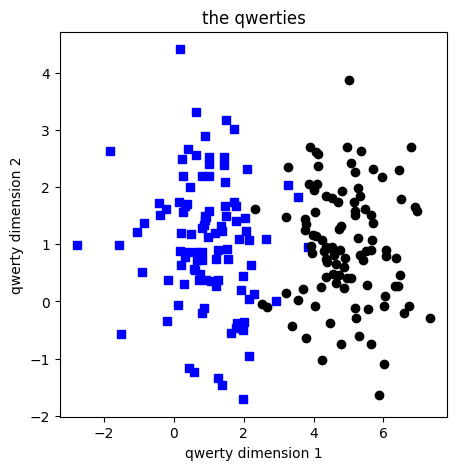

In [2]:
nPerClust = 100
blur = 1

A = [1,1]
B = [5,1]

a = [A[0] + np.random.randn(nPerClust)*blur, A[1] + np.random.randn(nPerClust)*blur]
b = [B[0] + np.random.randn(nPerClust)*blur, B[1] + np.random.randn(nPerClust)*blur]

labels_np = np.vstack((np.zeros((nPerClust, 1)), np.ones((nPerClust, 1))))

data_np = np.hstack((a,b)).T

data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0], 0], data[np.where(labels==0)[0], 1], 'bs')
plt.plot(data[np.where(labels==1)[0], 0], data[np.where(labels==1)[0], 1], 'ko')
plt.title('the qwerties')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [14]:
def createANNmodel(learning_rate):
    class Model(nn.Module):
        def __init__(self):
            super().__init__()
    
            self.input = nn.Linear(2,16)
    
            self.hidden = nn.Linear(16,1)
    
            self.output = nn.Linear(1,1)
        
        def forward(self, x):
            x = F.relu(self.input(x))
    
            x = F.relu(self.hidden(x))
    
            x = torch.sigmoid(self.output(x))
    
            return x
    
    ANNclassify = Model()
    
    lossfun = nn.BCELoss()
    optimizer = torch.optim.SGD(params=ANNclassify.parameters(), lr=learning_rate)

    return ANNclassify, lossfun, optimizer

In [21]:
learning_rate = 0.01
numEpochs = 1000


def trainTheModel(model):
    losses = torch.zeros(numEpochs)

    for i in range(numEpochs):
        yHat = model(data)

        loss = lossfun(yHat, labels)
        losses[i] = loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    predictions = model(data)
    totalacc = 100*torch.mean(((predictions>0.5)==labels).float())

    return losses, predictions, totalacc

In [22]:
ANNclassify, lossfun, optimizer = createANNmodel(learning_rate)
losses, predictions, totalacc = trainTheModel(ANNclassify)

Final accuracy: 96.5%


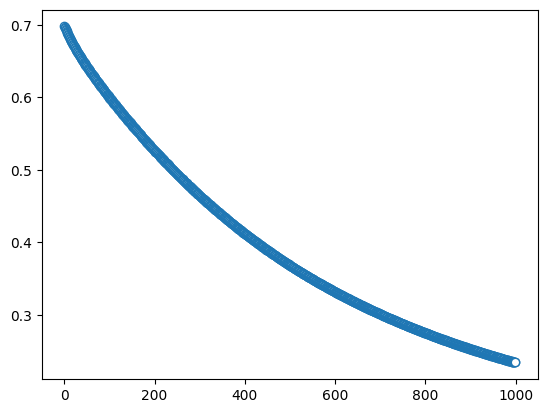

In [24]:
print("Final accuracy: %g%%" %totalacc)
plt.plot(losses.detach(), 'o-', markerfacecolor='w')
plt.show()